In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os

dir = os.getcwd()
os.chdir("/home/clueken/master/open_data")

import open_data_utils #import the module here, so that it can be reloaded.
importlib.reload(open_data_utils)
from open_data_utils import*

os.chdir(dir)


## Get data and specify directory for figures 

In [2]:
#directoy for figres
figure_dir = "/home/clueken/master/open_data/figures/wind_fields/"
#specify .nc file to open
filename = "/mnt/data/users/eschoema/ERA5/monthly_winds/era5_winds_2009_2019_650_750_850_950hPa.nc"
#load data into dataframe
gdf = load_era_to_gdf(filename, coarsen=15)

## Print information

In [3]:
#Get info of data

print("levels", np.unique(gdf.level.values))
print("earliest times", np.unique(gdf.time.values)[:3])
print("latest times", np.unique(gdf.time.values)[-3:])

levels [650 750 850 950]
earliest times ['2009-01-01T00:00:00.000000000' '2009-02-01T00:00:00.000000000'
 '2009-03-01T00:00:00.000000000']
latest times ['2019-10-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000']


## Plot single data

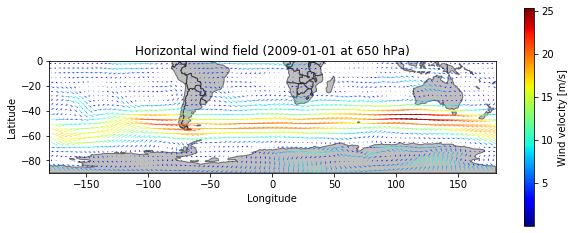

In [4]:
#To run plot a wind field of specific day for specific level

fig, ax = plt.subplots(figsize=(10,4))
plot_range = [[-180,180],[-90,0]]
time =  "2009-01-01"
level = 650
plot_range = [[-180,180],[-90,0]]
normalize = False
use_cmap = True


fig, ax = add_world_map(fig, ax, plot_range=plot_range, 
            color="gray", alpha=0.5, edgecolor="black")

fig, ax = plot_hwind_field(fig, ax, gdf, time, level,
            normalize=normalize, plot_range=plot_range, use_cmap=use_cmap, 
            cmap='jet', width=0.001)
'''
fig, ax = plot_hwind_field(fig, ax, gdf, "2009-01-01", 650,
            normalize=True, plot_range=plot_range, use_cmap=False, 
            cmap='jet', width=0.001, angles='xy', scale_units="xy", 
            scale=0.3)#scale=4)
'''
ax.set_xlim(plot_range[0])
ax.set_ylim(plot_range[1])
#fig.savefig(figure_dir + "sh_black_white_norm.jpg")
plt.show()

## Plot according to seasons

['2009-12-01', '2010-01-01', '2010-02-01']


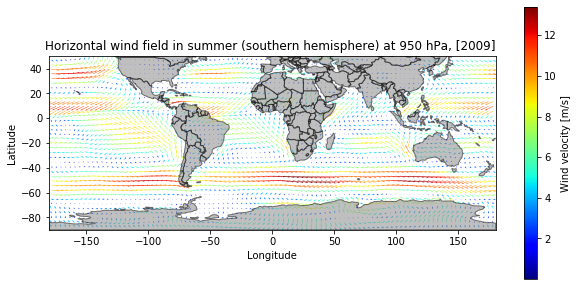

In [5]:
#To plt wind field averaged over seasons and years

fig, ax = plt.subplots(1,1, figsize=(10,5))
season = "summer"#["winter", "spring", "summer", "autumn"]
hemisphere = "south"
year = [2009]
level = 950
plot_range = [[-180,180],[-90,50]]
normalize = False
use_cmap = True

fig, ax = plot_hwind_field_season(fig, ax, gdf, 
            season=season, hemisphere=hemisphere,
            year=year, level=level,
            normalize=normalize, plot_range=plot_range, 
            use_cmap=use_cmap, cmap='jet', width=0.001)

for a in ax:
    fig, a = add_world_map(fig, a, plot_range=plot_range, 
            color="gray", alpha=0.5, edgecolor="black")
    a.set_xlim(plot_range[0])
    a.set_ylim(plot_range[1])

#fig.set_tight_layout(True)
#fig.savefig(figure_dir+"height_comparison/winter_09_950.pdf")
plt.show()

## Plot according to a month selection

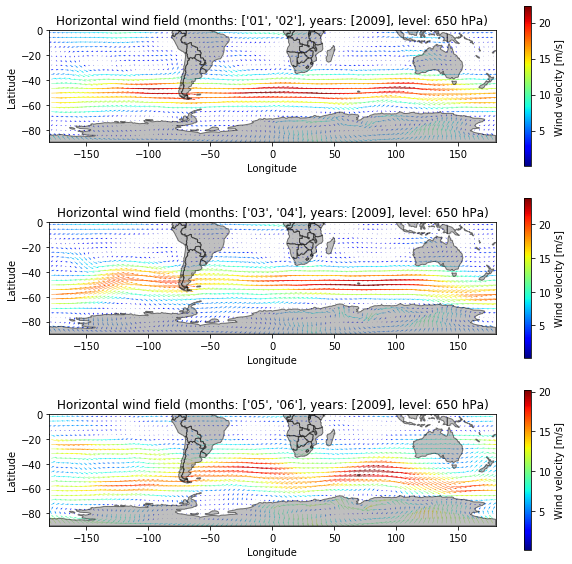

In [6]:
#To plot wind field averaged over months and years

fig, ax = plt.subplots(3,1, figsize=(10,10))
month = [[1,2], [3,4], [5,6]]
year = [2009]
level = 650
plot_range = [[-180,180],[-90,0]]
normalize = False
use_cmap = True

fig, ax = plot_hwind_field_month(fig, ax, gdf, 
            month=month, 
            year=year, level=level,
            normalize=normalize, plot_range=plot_range, 
            use_cmap=use_cmap, cmap='jet', width=0.001)

for a in ax:
    fig, a = add_world_map(fig, a, plot_range=plot_range, 
            color="gray", alpha=0.5, edgecolor="black")
    a.set_xlim(plot_range[0])
    a.set_ylim(plot_range[1])

#fig.set_tight_layout(True)
#fig.savefig(figure_dir+"month_selection.pdf")
plt.show()